# Assessment 3 - Regression Calculations

### Import Core Libraries

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

sns.set_theme(style='whitegrid', palette='bright') # Establish theme for graphs
plt.rcParams["figure.figsize"] = (10,7) # Make graphs larger

### Load Data from `pepsi.csv`

In [261]:
data = pd.read_csv('pepsi.csv')
data = data.drop('Unnamed: 5', axis=1)
data = data.dropna()
#data = data.drop(labels=12, axis=0)
#data = data.drop(labels=11, axis=0)
data.head()

,year,annual dividend,log(annual dividend),time,time2
0,2010.0,0.86,-0.0635,1.0,1.0
1,2011.0,0.96,-0.0177,2.0,4.0
2,2012.0,1.06,0.0237,3.0,9.0
3,2013.0,1.20,0.0792,4.0,16.0
4,2014.0,1.34,0.1284,5.0,25.0


### Assign Main Dependent and Independent Variables
**Time** is the main independent $ x $ variable and **Annual Dividend** is the main dependent $ y $ variable.

In [262]:
x = data['time'] # Independent variable
y = data['annual dividend'] # Dependent variable

### Create Scatter Plot for Main Variables

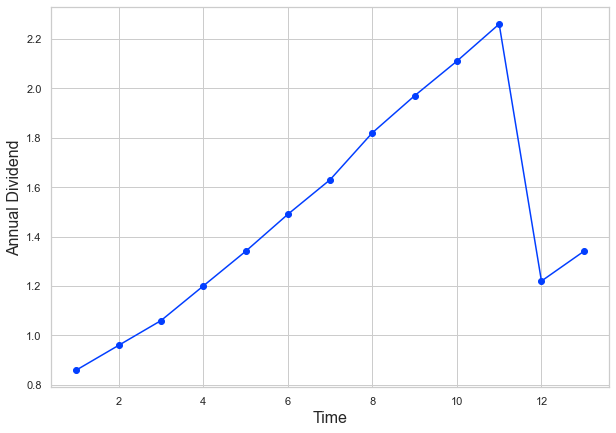

In [263]:
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Annual Dividend', fontsize = 16)
plt.show()

### Regression Plot for Main Variables

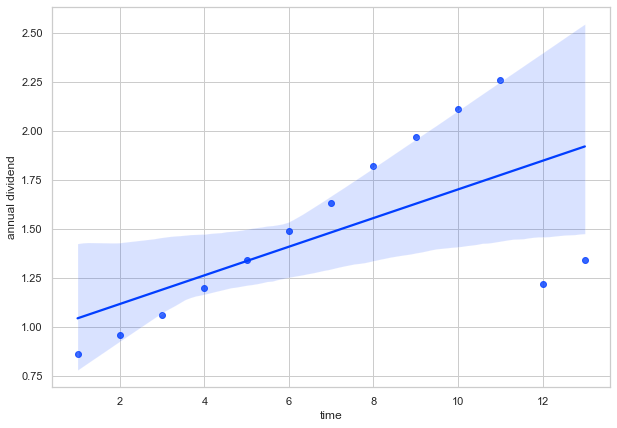

In [264]:
sns.regplot(data=data, x='time', y='annual dividend')

## Simple Linear Regression Analysis

The simple linear regression equation is: $ y = 0.97 + 0.073x $ 

In [265]:
import warnings
warnings.filterwarnings('ignore') # Ignore the n>20 warning as the sample size is under 20

x_c = sm.add_constant(x) # create constant value from x
results = sm.OLS(y,x_c).fit() # create OLS regression model
results.summary() # display results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        annual dividend   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     7.487
Date:                Sun, 07 Aug 2022   Prob (F-statistic):             0.0194
Time:                        22:25:47   Log-Likelihood:                -4.0900
No. Observations:                  13   AIC:                             12.18
Df Residuals:                      11   BIC:                             13.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9700      0.212      4.576      0.001       0.503       1.437
time           0.0731      0.027      2.736      0.019       0.014       0.132
==============================================================================
Omnibus:                        0.712   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.628
Skew:                          -0.439   Prob(JB):                        0.730
Kurtosis:                       2.376   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Simple Linear Regression Residual Plot

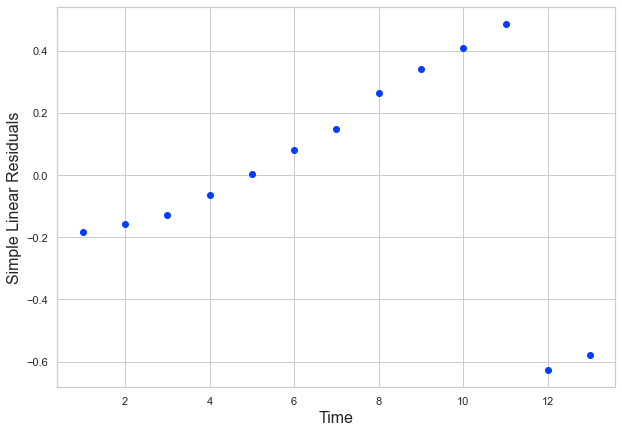

In [266]:
plt.scatter(x,results.resid)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Simple Linear Residuals', fontsize = 16)
plt.show()

### Plot the Simple Linear Equation

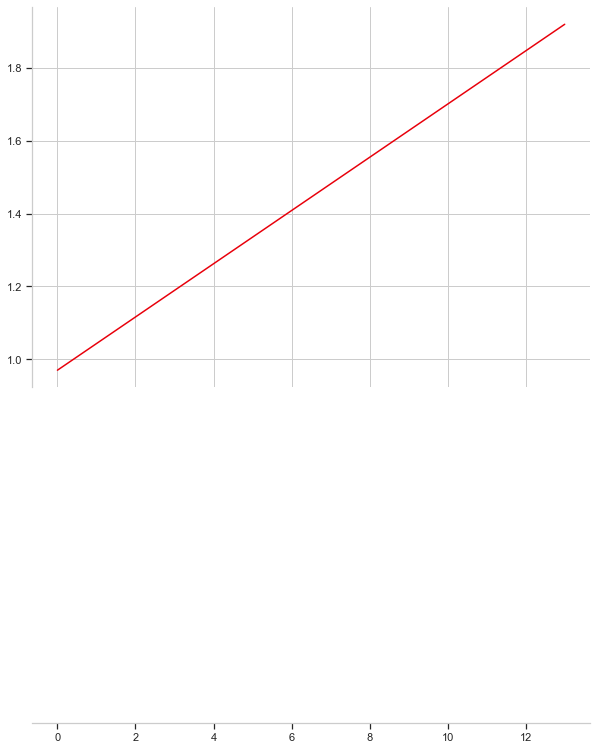

In [267]:
x_lin = np.linspace(0,13,100) # Create a basic numpy linspace for all graphs

# the function, which is y = 0.97 + 0.073x here
y_eq = 0.97 + (0.0731 * x_lin)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x_lin, y_eq, 'r')

# show the plot
plt.show()

## Quadratic Trend Regression Analysis
Get the time and time-squared data from the dataframe, to be used for multiple linear regression. 
Then apply multiple linear regression.
The quadratic regression equation is: $ y = 0.33 + 0.328x - 0.018x2 $

In [268]:
x_time = data[["time", "time2"]] # Independent variable of time and time-squared
x_c = sm.add_constant(x_time)
results2 = sm.OLS(y,x_c).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        annual dividend   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     10.72
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00325
Time:                        22:25:48   Log-Likelihood:              -0.018487
No. Observations:                  13   AIC:                             6.037
Df Residuals:                      10   BIC:                             7.732
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3322      0.270      1.229      0.247      -0.270       0.935
time           0.3282      0.089      3.694      0.004       0.130       0.526
time2         -0.0182      0.006     -2.951      0.015      -0.032      -0.004
==============================================================================
Omnibus:                        1.117   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.555
Skew:                           0.493   Prob(JB):                        0.758
Kurtosis:                       2.771   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quadratic Regression Residuals Plot

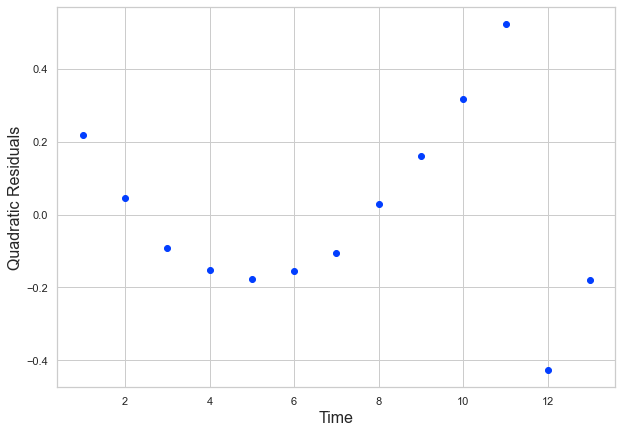

In [269]:
plt.scatter(x,results2.resid)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Quadratic Residuals', fontsize = 16)
plt.show()

### Plot the Quadratic Equation

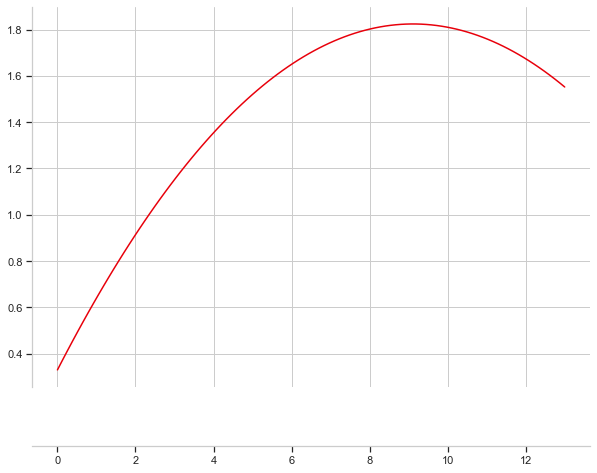

In [270]:
# the function, which is y = 0.33 + 0.328time - 0.018time2 here
y_eq = 0.33 + (0.328 * x_quad) - (0.018 * x_quad**2)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x_lin, y_eq, 'r')

# show the plot
plt.show()

## Exponential Trend Regression
Use the log of y, in this case `log(annual dividend)`, to produce the exponential trend regression.
The exponential regression equation is: $ y = -0.0071 + 0.0539x $ 

In [271]:
y_log = data["log(annual dividend)"] # Use the log of Annual Dividend
x_c = sm.add_constant(data['time'])
results3 = sm.OLS(y_log,x_c).fit()
results3.summary()

#b1 = 0.05390144506916017 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     log(annual dividend)   R-squared:                       0.454
Model:                              OLS   Adj. R-squared:                  0.404
Method:                   Least Squares   F-statistic:                     9.150
Date:                  Sun, 07 Aug 2022   Prob (F-statistic):             0.0116
Time:                          22:25:49   Log-Likelihood:                 12.344
No. Observations:                    13   AIC:                            -20.69
Df Residuals:                        11   BIC:                            -19.56
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0071      0.060     -0.118      0.908      -0.139       0.125
time           0.0228      0.008      3.025      0.012       0.006       0.039
==============================================================================
Omnibus:                        1.480   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                1.162
Skew:                          -0.602   Prob(JB):                        0.559
Kurtosis:                       2.167   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
# Show the dividend increase
b1 = 10 ** 0.0228
print(b1-1)

0.05390144506916017


### Exponential Regression Residuals Plot

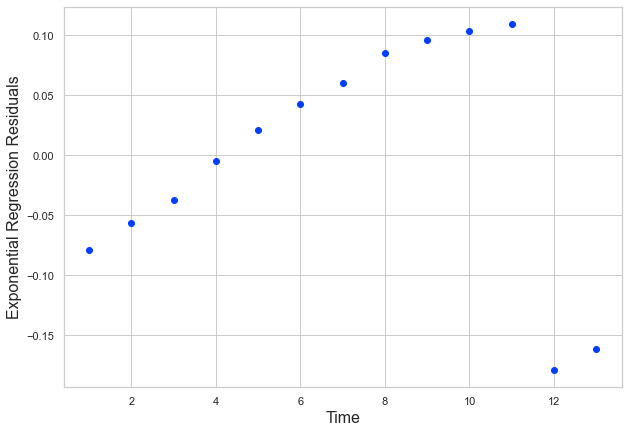

In [273]:
plt.scatter(x,results3.resid)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Exponential Regression Residuals', fontsize = 16)
plt.show()

### Plot the Exponential Equation

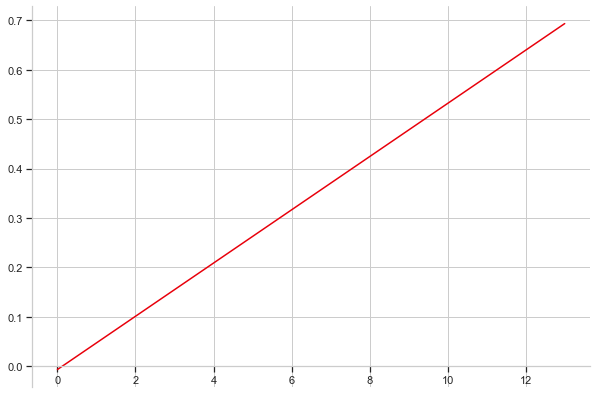

In [274]:
# the function, which is y = -0.0071 + 0.0539x here
y_eq = -0.0071 + (0.0539 * x_exp)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x_lin, y_eq, 'r')

# show the plot
plt.show()

## Auto Regression

### Auto Regression Using Lag 3
First load the data, then run the multiple linear regression.

In [275]:
data_lag3 = pd.read_csv('pepsi-lag3.csv')
data_lag3 = data_lag3.drop('Unnamed: 5', axis=1)
data_lag3 = data_lag3.dropna()
data_lag3['time'] = range(4,14) # Add time column to normalise graphs
data_lag3

,year,annual dividend,lag1,lag2,lag3,time
0,2013.0,1.20,1.06,0.96,0.86,4
1,2014.0,1.34,1.20,1.06,0.96,5
2,2015.0,1.49,1.34,1.20,1.06,6
3,2016.0,1.63,1.49,1.34,1.20,7
4,2017.0,1.82,1.63,1.49,1.34,8
5,2018.0,1.97,1.82,1.63,1.49,9
6,2019.0,2.11,1.97,1.82,1.63,10
7,2020.0,2.26,2.11,1.97,1.82,11
8,2021.0,1.22,2.26,2.11,1.97,12
9,2022.0,1.34,1.22,2.26,2.11,13


In [276]:
x_lag3 = data_lag3[["lag1", "lag2", "lag3"]] # Independent variable using lag1, lag2, and lag3
x_c = sm.add_constant(x_lag3)
y = data_lag3["annual dividend"]
results4 = sm.OLS(y,x_c).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        annual dividend   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     2.613
Date:                Sun, 07 Aug 2022   Prob (F-statistic):              0.146
Time:                        22:25:51   Log-Likelihood:                0.11707
No. Observations:                  10   AIC:                             7.766
Df Residuals:                       6   BIC:                             8.976
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1823      0.573      0.318      0.761      -1.220       1.585
lag1           0.3953      0.336      1.178      0.284      -0.426       1.217
lag2           9.7025      5.379      1.804      0.121      -3.461      22.866
lag3         -10.0758      5.513     -1.828      0.117     -23.565       3.413
==============================================================================
Omnibus:                        1.283   Durbin-Watson:                   3.008
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.030
Skew:                           0.035   Prob(JB):                        0.985
Kurtosis:                       3.258   Cond. No.                         231.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Auto Regression Using Lag 2
First load the data, then run the multiple linear regression.

In [277]:
data_lag2 = pd.read_csv('pepsi-lag2.csv')
data_lag2 = data_lag2.drop('Unnamed: 5', axis=1)
data_lag2 = data_lag2.drop('Unnamed: 4', axis=1)
data_lag2 = data_lag2.dropna()
data_lag2['time'] = range(3,14) # Add time column to normalise graphs
data_lag2.head()

,year,annual dividend,lag1,lag2,time
0,2012.0,1.06,0.96,0.86,3
1,2013.0,1.20,1.06,0.96,4
2,2014.0,1.34,1.20,1.06,5
3,2015.0,1.49,1.34,1.20,6
4,2016.0,1.63,1.49,1.34,7


In [278]:
x_lag2 = data_lag2[["lag1", "lag2"]] # Independent variable using lag1, lag2, and lag3
x_c = sm.add_constant(x_lag2)
y = data_lag2["annual dividend"]
results5 = sm.OLS(y,x_c).fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        annual dividend   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     2.884
Date:                Sun, 07 Aug 2022   Prob (F-statistic):              0.114
Time:                        22:25:51   Log-Likelihood:                -2.0969
No. Observations:                  11   AIC:                             10.19
Df Residuals:                       8   BIC:                             11.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6931      0.410      1.691      0.129      -0.252       1.638
lag1           0.6404      0.346      1.850      0.102      -0.158       1.439
lag2          -0.0665      0.318     -0.209      0.840      -0.800       0.667
==============================================================================
Omnibus:                       11.199   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                5.567
Skew:                          -1.462   Prob(JB):                       0.0618
Kurtosis:                       4.896   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Auto Regression Using Lag 1
First load the data, then run the simple linear regression.

In [279]:
data_lag1 = pd.read_csv('pepsi-lag1.csv')
data_lag1 = data_lag1.drop('Unnamed: 7', axis=1)
data_lag1 = data_lag1.drop('Unnamed: 6', axis=1)
data_lag1 = data_lag1.drop('Unnamed: 5', axis=1)
data_lag1 = data_lag1.drop('Unnamed: 4', axis=1)
data_lag1 = data_lag1.drop('Unnamed: 3', axis=1)
data_lag1 = data_lag1.dropna()
data_lag1['time'] = range(2,14) # Add time column to normalise graphs
data_lag1.head()

,year,annual dividend,lag1,time
0,2011.0,0.96,0.86,2
1,2012.0,1.06,0.96,3
2,2013.0,1.20,1.06,4
3,2014.0,1.34,1.20,5
4,2015.0,1.49,1.34,6


In [280]:
x_lag1 = data_lag1["lag1"] # Independent variable using lag1, lag2, and lag3
x_c = sm.add_constant(x_lag1)
y = data_lag1["annual dividend"]
results6 = sm.OLS(y,x_c).fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        annual dividend   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     10.14
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00974
Time:                        22:25:51   Log-Likelihood:                -2.0190
No. Observations:                  12   AIC:                             8.038
Df Residuals:                      10   BIC:                             9.008
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5661      0.317      1.786      0.104      -0.140       1.272
lag1           0.6477      0.203      3.185      0.010       0.195       1.101
==============================================================================
Omnibus:                       14.198   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.810
Skew:                          -1.645   Prob(JB):                       0.0122
Kurtosis:                       5.607   Cond. No.                         7.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot All 6 Residuals on 1 Chart

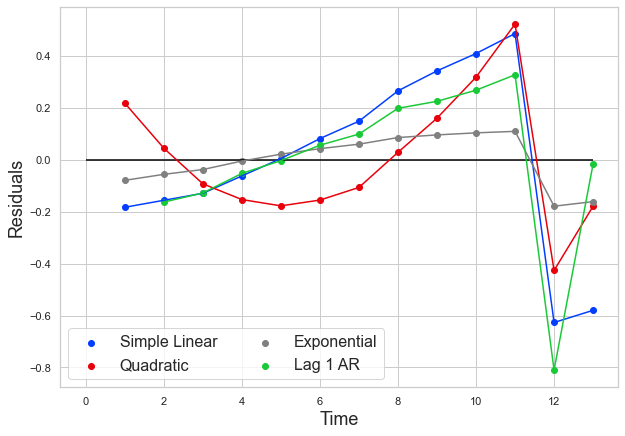

In [281]:
x = data['time']
x_lag1 = data_lag1['time']
x_lag2 = data_lag2['time']
x_lag3 = data_lag3['time']

# Plot linear residuals
res1 = plt.scatter(x,results.resid, color='b')
plt.plot(x,results.resid, color='b')

# Plot quadratic residuals
res2 = plt.scatter(x,results2.resid, color='r')
plt.plot(x,results2.resid, color='r')

# Plot exponential residuals
res3 = plt.scatter(x,results3.resid, color='grey')
plt.plot(x,results3.resid, color='grey')

# Plot Lag 3 residuals (unnecessary)
#res4 = plt.scatter(x_lag3,results4.resid, color='y')
#plt.plot(x_lag3,results4.resid, color='y')

# Plot Lag 2 residuals (unnecessary)
#res5 = plt.scatter(x_lag2, results5.resid, color='purple')
#plt.plot(x_lag2,results5.resid, color='purple')

# Plot Lag 1 residuals
res6 = plt.scatter(x_lag1, results6.resid, color='g')
plt.plot(x_lag1,results6.resid, color='g')

# Add line through y=0, then add labels and legend
plt.hlines(0, 0, 13, color='black')
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Residuals', fontsize = 18)
plt.legend((res1, res2, res3, res6), 
           ('Simple Linear', 'Quadratic', 'Exponential', 'Lag 1 AR'), 
           scatterpoints=1, loc='lower left', ncol=2, fontsize=16)
plt.show()